# Gradient Descent Demonstration

Author: Umberto Michelucci, (C) TOELT LLC 2022


## Gradient Descent

Gradient Descent is an optimization algorithm used for minimizing the cost function in various machine learning algorithms. It is the backbone of an artificial neural network training process and is used across various contexts in the field of deep learning and machine learning.

### Overview

The main idea of gradient descent is to iteratively adjust the parameters of a model to minimize the cost function. The cost function measures how far the model's predictions are from the actual outcomes.

### The Gradient Descent Algorithm

The algorithm updates the parameters in the opposite direction of the gradient of the cost function with respect to the parameters. The size of these steps is determined by the learning rate $\alpha$. 

#### The Update Rule

The parameters $ x $ are updated as follows:

$$
x_{i+1} = x_i - x_i \cdot \nabla_\theta f(x_i)
$$

- $i$ represents the iteration.
- $ x_i $ represents the parameters of the model.
- $ \alpha $ is the learning rate.
- $ f(x_i) $ is the cost function.
- $ \nabla_\theta f(x_i) $ is the gradient of $ f $ with respect to $ x_i $.

### Learning Rate

- The learning rate $ \alpha$ is a crucial hyperparameter. 
- A too small $\alpha $ makes the learning process slow, while a too large $ \alpha $ can cause the algorithm to overshoot the minimum or even diverge.

### Types of Gradient Descent

1. **Batch Gradient Descent**: Computes the gradient using the whole dataset. This is computationally expensive but gives a stable gradient estimation.

2. **Stochastic Gradient Descent (SGD)**: Computes the gradient using a single sample. It's faster but the gradient estimation is noisier.

3. **Mini-batch Gradient Descent**: Strikes a balance between Batch GD and SGD by using a subset of the dataset to compute the gradient.

### Convergence

- The algorithm converges when the cost function reaches a minimum value, where the gradient is zero or close to zero.

### Application

- Widely used in neural network training and other machine learning algorithms where the objective is to minimize a cost function.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

$$
f(x) = x^2-1.6x^3+0.02x^5+100e^{-(x-2.5)^2}
$$

the derivative of this function is
$$
f'(x) = 2x-4.8x^2+0.1x^4-200(x-2.5)e^{-(x-2.5)^2}
$$

In [3]:
# Function
def f(x):
    return x**2-1.6*x**3+0.02*x**5+100*np.exp(-(x-2.5)**2)

# First derivative df(x)/dx.
def df(x):
    return 2*x-4.8*x**2+0.1*x**4-200.0*(x-2.5)*np.exp(-(x-2.5)**2)

In [4]:
xx = np.arange(-10,10,0.1)
yy = f(xx)

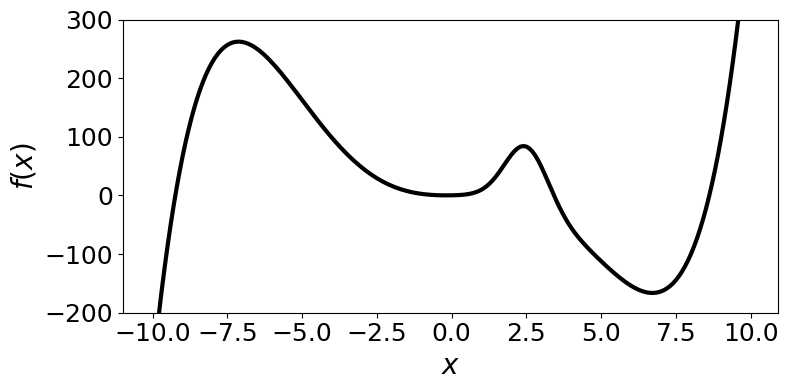

In [5]:
fig = plt.figure(figsize = (8,4))
plt.plot(xx,yy, color = 'black', lw = 3)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

plt.ylim(-200,300)
plt.xlabel('$x$', fontsize = 20)
plt.ylabel('$f(x)$', fontsize = 20)
plt.tight_layout()
fig.savefig('gd1.eps')
plt.show()

let's try to find the minima of this function. We will use the gradient descent method.

We will use the following formula for the gradient descent
$$
x_{n+1} = x_n - \gamma \frac{df}{dx}(x_n)
$$

In [6]:
def new_approx(old_approx, gamma):
    return old_approx - gamma*df(old_approx)

Let's generate a list of succesful approximations.

## Some notes on Python Functions used

The `math.isnan()` function is a utility in Python's standard `math` library used to check whether a given value is a NaN (Not a Number). Here's a detailed description:

### `math.isnan()`

#### Overview
- `math.isnan()` is a function that tests if a floating-point number is NaN (Not a Number).
- NaN is a special floating-point value which is used to represent undefined or unrepresentable values, like the result of dividing 0 by 0.

#### Syntax
```python
import math
result = math.isnan(x)
```
- `x` is the value you want to test. It should be a floating-point number or a value that can be interpreted as one.

#### Return Value
- The function returns a Boolean value:
  - `True` if `x` is NaN.
  - `False` if `x` is not NaN.

#### Usage
- This function is commonly used in data processing and scientific computations where you might encounter NaN values.
- It's particularly useful in situations where NaN values could lead to errors or unexpected results if not handled properly.

#### Example
```python
import math

print(math.isnan(0))         # False
print(math.isnan(math.nan))  # True
print(math.isnan(float('nan')))  # True
print(math.isnan(3.14))      # False
```

#### Important Notes
- NaN values are a bit unique in the sense that a NaN value is not equal to anything, not even itself. That's why standard comparison operators (like `==`) cannot be used to check for NaN.
- `math.isnan()` is part of the standard math library in Python, so there's no need for external packages to use this function.

Certainly! The `math.isinf()` function is a utility in Python's standard `math` library that checks whether a given value is an infinite number. Here's a detailed description:

### `math.isinf()`

#### Overview
- `math.isinf()` is a function used to test if a floating-point number is either positive infinity or negative infinity.
- In floating-point arithmetic, infinity is a special value that is greater than all other numeric values.

#### Syntax
```python
import math
result = math.isinf(x)
```
- `x` is the value to be tested. It should be a floating-point number or a value that can be interpreted as one.

#### Return Value
- The function returns a Boolean value:
  - `True` if `x` is either positive or negative infinity.
  - `False` if `x` is not infinite.

#### Usage
- This function is useful in scenarios where you need to check for infinite values, which might occur in certain types of computations like divisions by zero.
- Handling infinities properly is important in numerical computations to avoid errors and ensure accurate results.

#### Example
```python
import math

print(math.isinf(0))           # False
print(math.isinf(math.inf))    # True
print(math.isinf(-math.inf))   # True
print(math.isinf(3.14))        # False
```

#### Important Notes
- `math.isinf()` is specifically for checking infinity and is distinct from `math.isnan()`, which checks for 'Not a Number' values.
- Infinity in Python can be represented as `math.inf` (positive infinity) or `-math.inf` (negative infinity).
- Like `math.isnan()`, `math.isinf()` is part of the standard math library in Python and does not require any external packages.


In [7]:
def generate_approxs(starting_point, gamma):
    approxs = [starting_point]

    for i in range(10):
        tmp = new_approx(approxs[-1], gamma)
        if ((not math.isnan(tmp)) & (not math.isinf(tmp))):
            approxs.append(tmp)
    
    return approxs

In [8]:
app1 = generate_approxs(-7.5, 0.1)
app2 = generate_approxs(-5.0, 0.1)
app3 = generate_approxs(-5.0, 0.01)
app4 = generate_approxs(9.5, 0.01)

/var/folders/lh/l7llhsl54q541j2xt3lxz1vh0000gn/T/ipykernel_56901/336993612.py:7: RuntimeWarning: overflow encountered in scalar power
  return 2*x-4.8*x**2+0.1*x**4-200.0*(x-2.5)*np.exp(-(x-2.5)**2)


Starting from the left of the peak make the approximations diverge quickly

In [9]:
# can you tell why this output gives less than 10 values?
app1

[-7.5,
 -10.640625,
 -82.35975954115393,
 -456918.5102514672,
 -4.3586802283305396e+20,
 -3.6092755028328316e+80]

In [10]:
app2

[-5.0,
 1.75,
 -5.770531433463846,
 0.27885470130396595,
 -0.059556932056520795,
 -0.11905491678955207,
 -0.1434159521117535,
 -0.15367313769595115,
 -0.15801572042535894,
 -0.15985676404048846,
 -0.16063760399052274]

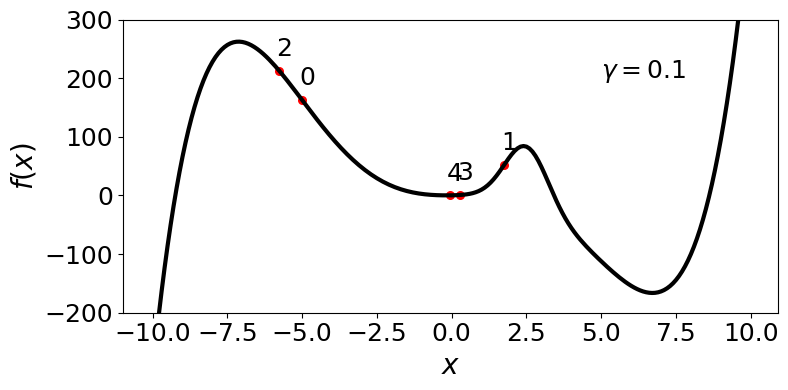

In [11]:
fig = plt.figure(figsize = (8,4))
plt.plot(xx,yy, color = 'black', lw = 3)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

plt.ylim(-200,300)
plt.xlabel('$x$', fontsize = 20)
plt.ylabel('$f(x)$', fontsize = 20)


v = app2[0:5]
plt.scatter(v, f(np.array(v)), color = 'red', s = 30)
for i in range(len(v)):
    plt.text(v[i]-0.1, f(v[i])+25, str(i), fontsize = 18)

plt.text(5,200, r'$\gamma = 0.1$', fontsize = 18)
    
plt.tight_layout()
fig.savefig('gd1.eps')
plt.show()

In [12]:
f(np.array(app2))

array([1.62500000e+02, 5.17940442e+01, 2.12773760e+02, 7.63234945e-01,
       1.46706253e-01, 1.21822824e-01, 1.17608148e-01, 1.16859468e-01,
       1.16725208e-01, 1.16701073e-01, 1.16696732e-01])

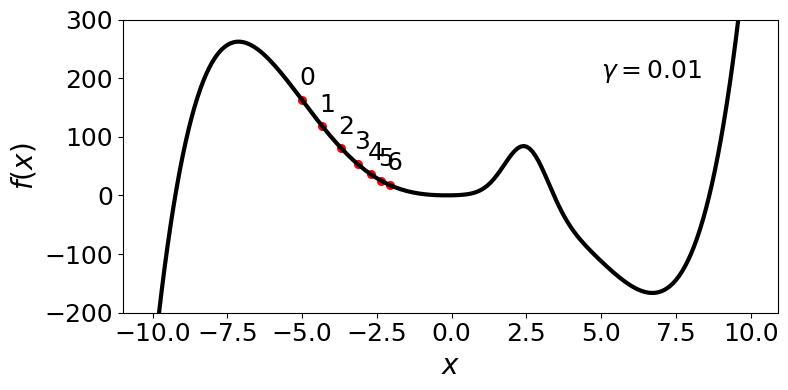

In [13]:
fig = plt.figure(figsize = (8,4))
plt.plot(xx,yy, color = 'black', lw = 3)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

plt.ylim(-200,300)
plt.xlabel('$x$', fontsize = 20)
plt.ylabel('$f(x)$', fontsize = 20)


v = app3[0:7]
plt.scatter(v, f(np.array(v)), color = 'red', s = 30)
for i in range(len(v)):
    plt.text(v[i]-0.1, f(v[i])+25, str(i), fontsize = 18)

plt.text(5,200, r'$\gamma = 0.01$', fontsize = 18)
    
plt.tight_layout()
fig.savefig('gd1.eps')
plt.show()

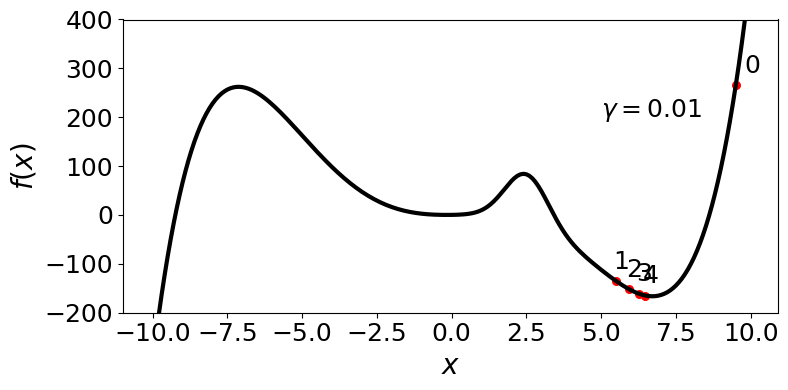

In [14]:
fig = plt.figure(figsize = (8,4))
plt.plot(xx,yy, color = 'black', lw = 3)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

plt.ylim(-200,400)
plt.xlabel('$x$', fontsize = 20)
plt.ylabel('$f(x)$', fontsize = 20)


v = app4[0:5]
plt.scatter(v, f(np.array(v)), color = 'red', s = 30)
for i in range(len(v)):
    if (i==0):
        plt.text(v[i]+0.3, f(v[i])+25, str(i), fontsize = 18)
    else:
        plt.text(v[i]-0.1, f(v[i])+25, str(i), fontsize = 18)

plt.text(5,200, r'$\gamma = 0.01$', fontsize = 18)
    
plt.tight_layout()
fig.savefig('gd1.eps')
plt.show()

# Exercises

## Exercise 1

Can you find a learning rate value that will allow the GD to find the absolute minimum when starting at $x_0=-5$?

## Exercise 2

Develop the GD from scratch to find the minimum of the function
$$
f(x) = (x-3)^2
$$